<center><h1>In the name of Allah</h1></center>

<font color = 'yellow'><h2>Introduction</h2></font>

The main challenge for dry bean producers and markets is determining the best seed to use, as lower-quality seeds can lead to reduced yields despite ideal cultivation conditions. Dry beans are essential in food technology and exhibit genetic diversity globally. The Turkish Standards Institution categorizes dry beans based on botanical characteristics. Analyzing and classifying dry bean genotypes is crucial for crop production, and automating the grading process is necessary due to the inefficiency of manual sorting. This study aims to develop artificial intelligence-based models for classifying dry bean types according to Turkish Standards, focusing on morphological similarities rather than distinct color features.

<font color = 'yellow'><h2>Exploratory Data Analysis (EDA)</h2></font>

<font color = 'cyan'>Load Data & Import Tools</font>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bean_df = pd.read_csv('data/Dry_Bean_Dataset.csv')

<font color = 'cyan'>Data Exploration</font>

In [4]:
bean_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
bean_df.isnull().any()

Area               False
Perimeter          False
MajorAxisLength    False
MinorAxisLength    False
AspectRation       False
Eccentricity       False
ConvexArea         False
EquivDiameter      False
Extent             False
Solidity           False
roundness          False
Compactness        False
ShapeFactor1       False
ShapeFactor2       False
ShapeFactor3       False
ShapeFactor4       False
Class              False
dtype: bool

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64


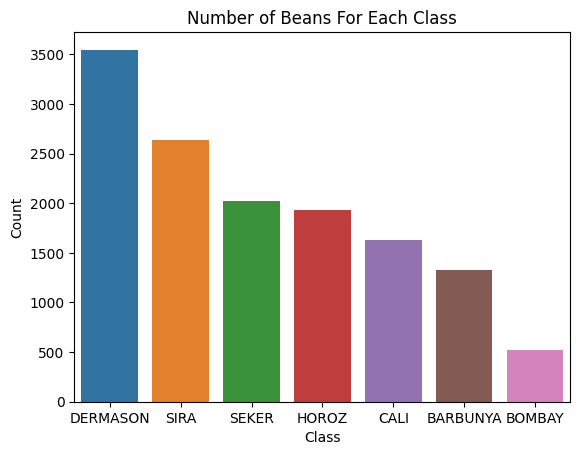

In [7]:
classes_count = bean_df['Class'].value_counts()
print(classes_count)
plt.figure()
sns.barplot(x=classes_count.index, y=classes_count.values,hue=classes_count.index)
plt.ylabel('Count');
plt.title('Number of Beans For Each Class');

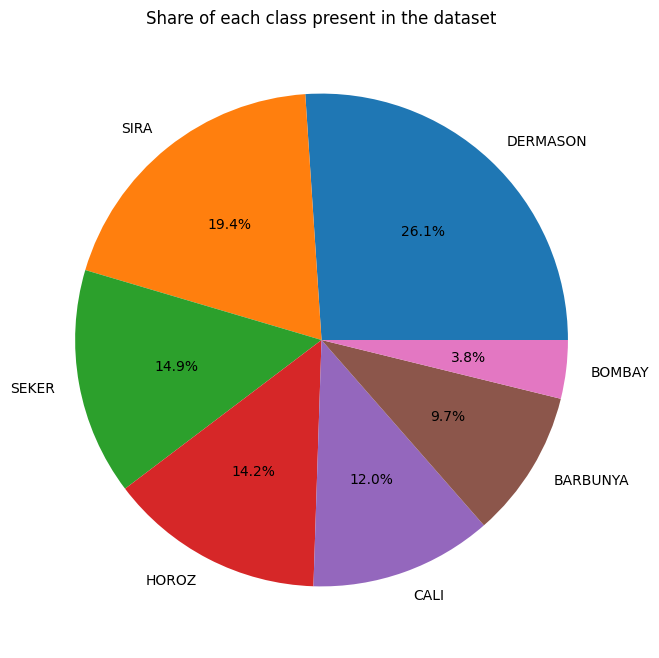

In [8]:
plt.figure(figsize=(10,8))
plt.pie(classes_count.values,labels=classes_count.index,autopct='%1.1f%%');
plt.title('Share of each class present in the dataset');

According to the above results, it can be understood that the existing dataset does not contain null values.  Also, the data refer to seven classes of beans as shown in the figure above. Therefore, it is better to change the type of the `Class` parameter from object to category so that the dataset occupies less memory. It is worth to note that all the 16 features defined in this dataset are numerical.

As can be seen in the figure, `DERMASON` and `BOMBAY`types have the highest and lowest number of data in this dataset, respectively. In fact, the `BOMBAY` type comprises only about 4% of the whole data. Meanwhile, the `DERMASON` type covers about 26% of the whole data. Hence, the dataset is _imbalanced_.

In [9]:
bean_df['Class'] = bean_df['Class'].astype(dtype='category')
bean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area             13611 non-null  int64   
 1   Perimeter        13611 non-null  float64 
 2   MajorAxisLength  13611 non-null  float64 
 3   MinorAxisLength  13611 non-null  float64 
 4   AspectRation     13611 non-null  float64 
 5   Eccentricity     13611 non-null  float64 
 6   ConvexArea       13611 non-null  int64   
 7   EquivDiameter    13611 non-null  float64 
 8   Extent           13611 non-null  float64 
 9   Solidity         13611 non-null  float64 
 10  roundness        13611 non-null  float64 
 11  Compactness      13611 non-null  float64 
 12  ShapeFactor1     13611 non-null  float64 
 13  ShapeFactor2     13611 non-null  float64 
 14  ShapeFactor3     13611 non-null  float64 
 15  ShapeFactor4     13611 non-null  float64 
 16  Class            13611 non-null  categor

In [10]:
bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


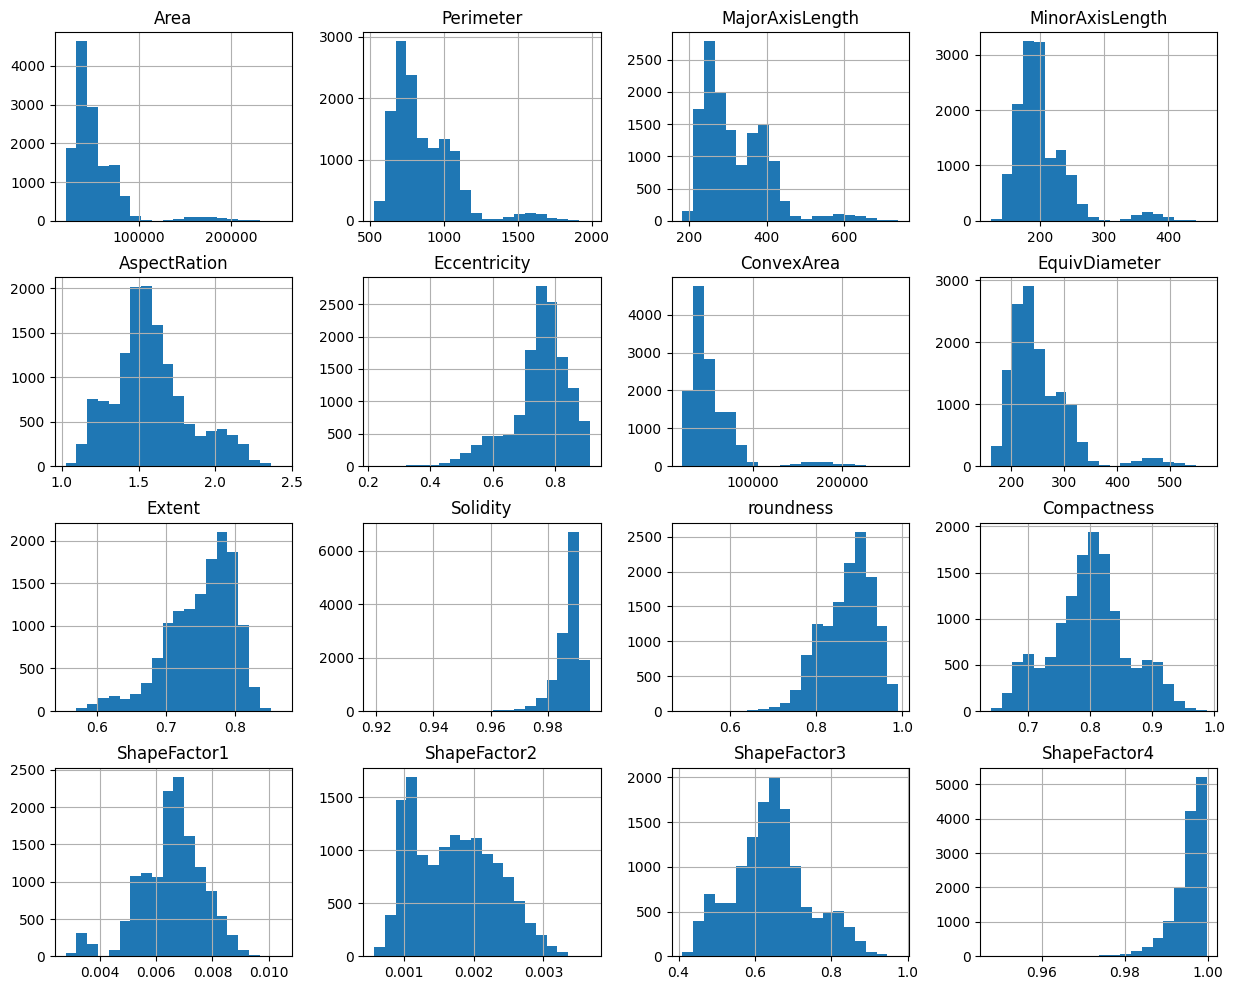

In [11]:
bean_df.hist(figsize=(15,12),bins=20);

In [12]:
from scipy.stats import skew
features = bean_df.drop('Class', axis=1)
feature_skews = skew(features)
skew_before_clean = pd.Series(feature_skews,index=features.columns)
skew_before_clean

Area               2.952606
Perimeter          1.625944
MajorAxisLength    1.357666
MinorAxisLength    2.237964
AspectRation       0.582509
Eccentricity      -1.062707
ConvexArea         2.941497
EquivDiameter      1.948743
Extent            -0.895250
Solidity          -2.549812
roundness         -0.635679
Compactness        0.037111
ShapeFactor1      -0.534082
ShapeFactor2       0.301193
ShapeFactor3       0.242454
ShapeFactor4      -2.759179
dtype: float64

The above results show different statistical parameters of the features as well as their histograms (Before Data Cleaning). In addition, skewness values have been calculated for each feature. These results show that most features do not have a symmetric distribution, while `Compactness` has an almost symmetric distribution.

<font color = 'cyan'>Features Definition </font>

<b>Area (A)</b>: The area of a bean zone and the number of pixels within its boundaries.

<b>Perimeter (P)</b>: Bean circumference is defined as the length of its border.

<b>Major axis length (L)</b>: The distance between the ends of the longest line that can be drawn from a bean.

<b>Minor axis length (l)</b>: The longest line that can be drawn from the bean while standing perpendicular to the main axis.

<b>Aspect ratio (K)</b>: Defines the relationship between L and l.

$$ K = \frac{L}{l} $$


<b>Eccentricity (Ec)</b>: Eccentricity of the ellipse having the same moments as the region.


<b>Convex area (C)</b>: Number of pixels in the smallest convex polygon that can contain the area of a bean seed.


<b>Equivalent diameter (Ed)</b>: The diameter of a circle having the same area as a bean seed area.

$$ d = \sqrt{\frac{4 * A}{\pi}} $$


<b>Extent (Ex)</b>: The ratio of the pixels in the bounding box to the bean area.

$$Ex = \frac{A}{A_{B}}$$

Where <i>A<sub>B</sub></i> is the area of bounding rectangle.


<b>Solidity (S)</b>: Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

$$ S = \frac{A}{C} $$


<b>Roundness (R)</b>: Calculated with the following formula:

$$ R = \frac{4 * \pi * A}{P^{2}} $$


<b>Compactness (CO)</b>: Measures the roundness of an object:

$$ CO = \frac{Ed}{L} $$


<b>The shape features used in the classification of the bean seeds are as follows:</b>

$$ShapeFactor1 (SF1) = \frac{L}{A}$$

$$ ShapeFactor2 (SF2) = \frac{l}{A} $$

$$ ShapeFactor3 (SF3) = \frac{A}{\frac{L}{2} * \frac{L}{2} * \pi} $$

$$ ShapeFactor4 (SF4) = \frac{A}{\frac{L}{2} * \frac{l}{2} * \pi} $$

<h3>Data Cleaning</h3>

<font color = 'cyan'>Remove Duplicates</font>

In [13]:
bean_df = bean_df.drop_duplicates()

In [14]:
bean_df = bean_df.reset_index(drop=True)

In [15]:
bean_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13538,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13539,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13540,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13541,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


The initial dataset contained 13,611 rows of data, in order to prepare the data for the classification task, the first step is to remove duplicate data. By removing duplicate data, the number of rows in the dataset became 13,543 rows. In other words, there were 68 duplicate data in the dataset.

<font color = 'cyan'>Outlier Detection</font>

The second step to prepare the data for the mentioned task is to remove the outlier data. To do so, there are different methods, including `Z-score`, `Leverage` and `IQR` methods.

The `Interquartile Range (IQR)` is a measure of statistical dispersion, which is calculated as the difference between the third quartile (Q3) and the first quartile (Q1) of a dataset. It is often used in outlier detection as a robust measure of spread that is less sensitive to extreme values compared to the range or standard deviation.

`Z-score` is a statistical measure that tells you how far a data point is from the mean of a dataset in terms of standard deviations. In the context of outlier detection, Z-score can be used to identify data points that are significantly different from the rest of the data.

The `Leverage approach` is used to remove outlier data in this study. In this approach, a hat matrix (H) is defined to measure data points' relative distance:

$$ H = X (X^{T}X)^{-1} X^{T} $$

Where H and X represent the Hat matrix and the descriptor matrix, respectively. The diagonal elements of the H matrix are called hat values or leverages (<i>h<sub>i</sub></i>). In the leverage approach, a threshold for relative distance is defined to accept or reject the data points. This parameter is defined as **3(q+1)/p**, in which q is the number of features and p is the number of data points. The data points with <i>h<sub>i</sub></i> larger than the threshold have a high relative distance from the bulk of the data and must be removed.

In [16]:
X = bean_df.drop('Class',axis=1).to_numpy()
H = X @ np.linalg.inv(X.T @ X) @ X.T
h = np.diag(H)

p, q = X.shape
limit = 3*(q+1) / p

bean_df['leverage'] = np.abs(h)
bean_df = bean_df[bean_df['leverage'] <= limit]
bean_df = bean_df.drop('leverage', axis=1)

In [17]:
bean_df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000,12928.000000
mean,50071.875232,836.126942,313.296687,198.128498,1.581263,0.751135,50734.606126,247.816905,0.749534,0.987425,0.875875,0.800261,0.006634,0.001736,0.644105,0.995307
std,21798.819975,179.755711,73.724022,35.759844,0.243384,0.089125,22141.216694,48.378240,0.048768,0.003966,0.056897,0.060723,0.001021,0.000576,0.097280,0.003794
min,20786.000000,530.825000,191.994494,132.143553,1.107540,0.429846,21057.000000,162.682381,0.566669,0.963739,0.645163,0.648762,0.003252,0.000717,0.420892,0.969279
25%,36136.000000,701.418500,252.756681,175.428680,1.432498,0.716019,36532.250000,214.498914,0.718512,0.985916,0.835826,0.763721,0.005988,0.001189,0.583270,0.993933
50%,44137.500000,788.186000,293.946052,191.743724,1.548943,0.763674,44662.000000,237.060352,0.759237,0.988347,0.885436,0.801934,0.006669,0.001719,0.643099,0.996470
75%,59425.000000,961.523750,371.899804,213.525378,1.702127,0.809224,60257.250000,275.067737,0.786493,0.990036,0.917887,0.834251,0.007287,0.002181,0.695974,0.997919
max,191093.000000,1686.806000,635.717240,394.902905,2.364017,0.906126,194125.000000,493.261760,0.866195,0.994260,0.990685,0.950073,0.009666,0.003277,0.902638,0.999733


Carrying out the step of removing outlier data caused the number of dataset rows to decrease from 13,543 to 12,928. In fact, only about 4% of the total data were outliers.

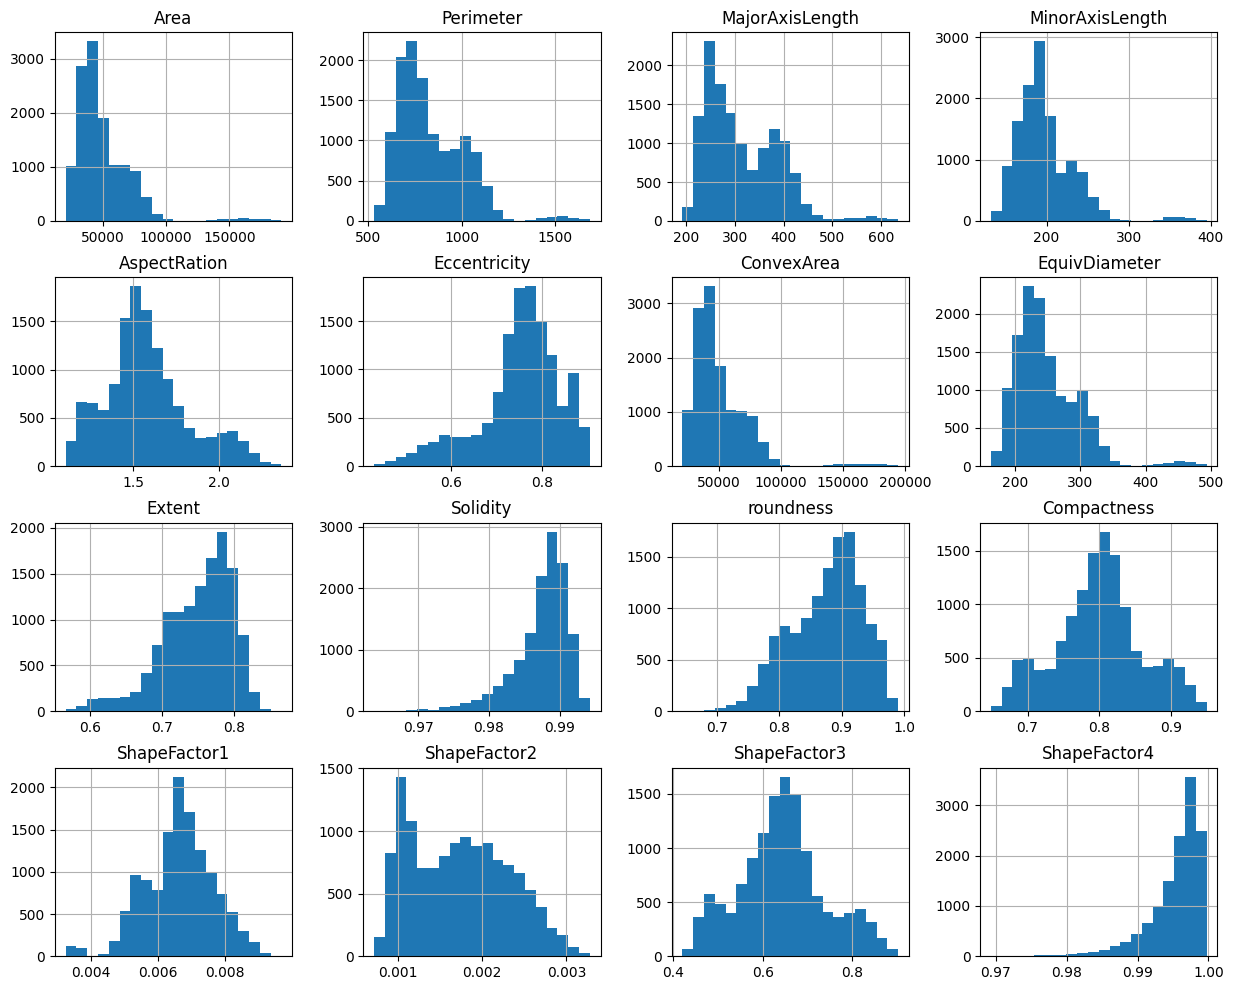

In [18]:
bean_df.hist(figsize=(15,12),bins=20);

The histogram of features can be seen in the above figure (After Data Cleaning). There is a slight difference between the histogram of features before and after data cleaning.

In [19]:
from scipy.stats import skew
features = bean_df.drop('Class', axis=1)
feature_skews = skew(features)
skew_after_clean = pd.Series(feature_skews,index=features.columns)
skew_after_clean

Area               2.492386
Perimeter          1.170045
MajorAxisLength    0.918909
MinorAxisLength    1.790637
AspectRation       0.608666
Eccentricity      -0.914465
ConvexArea         2.470367
EquivDiameter      1.460863
Extent            -0.892401
Solidity          -1.606493
roundness         -0.466277
Compactness       -0.007833
ShapeFactor1      -0.272873
ShapeFactor2       0.257102
ShapeFactor3       0.189201
ShapeFactor4      -1.944007
dtype: float64

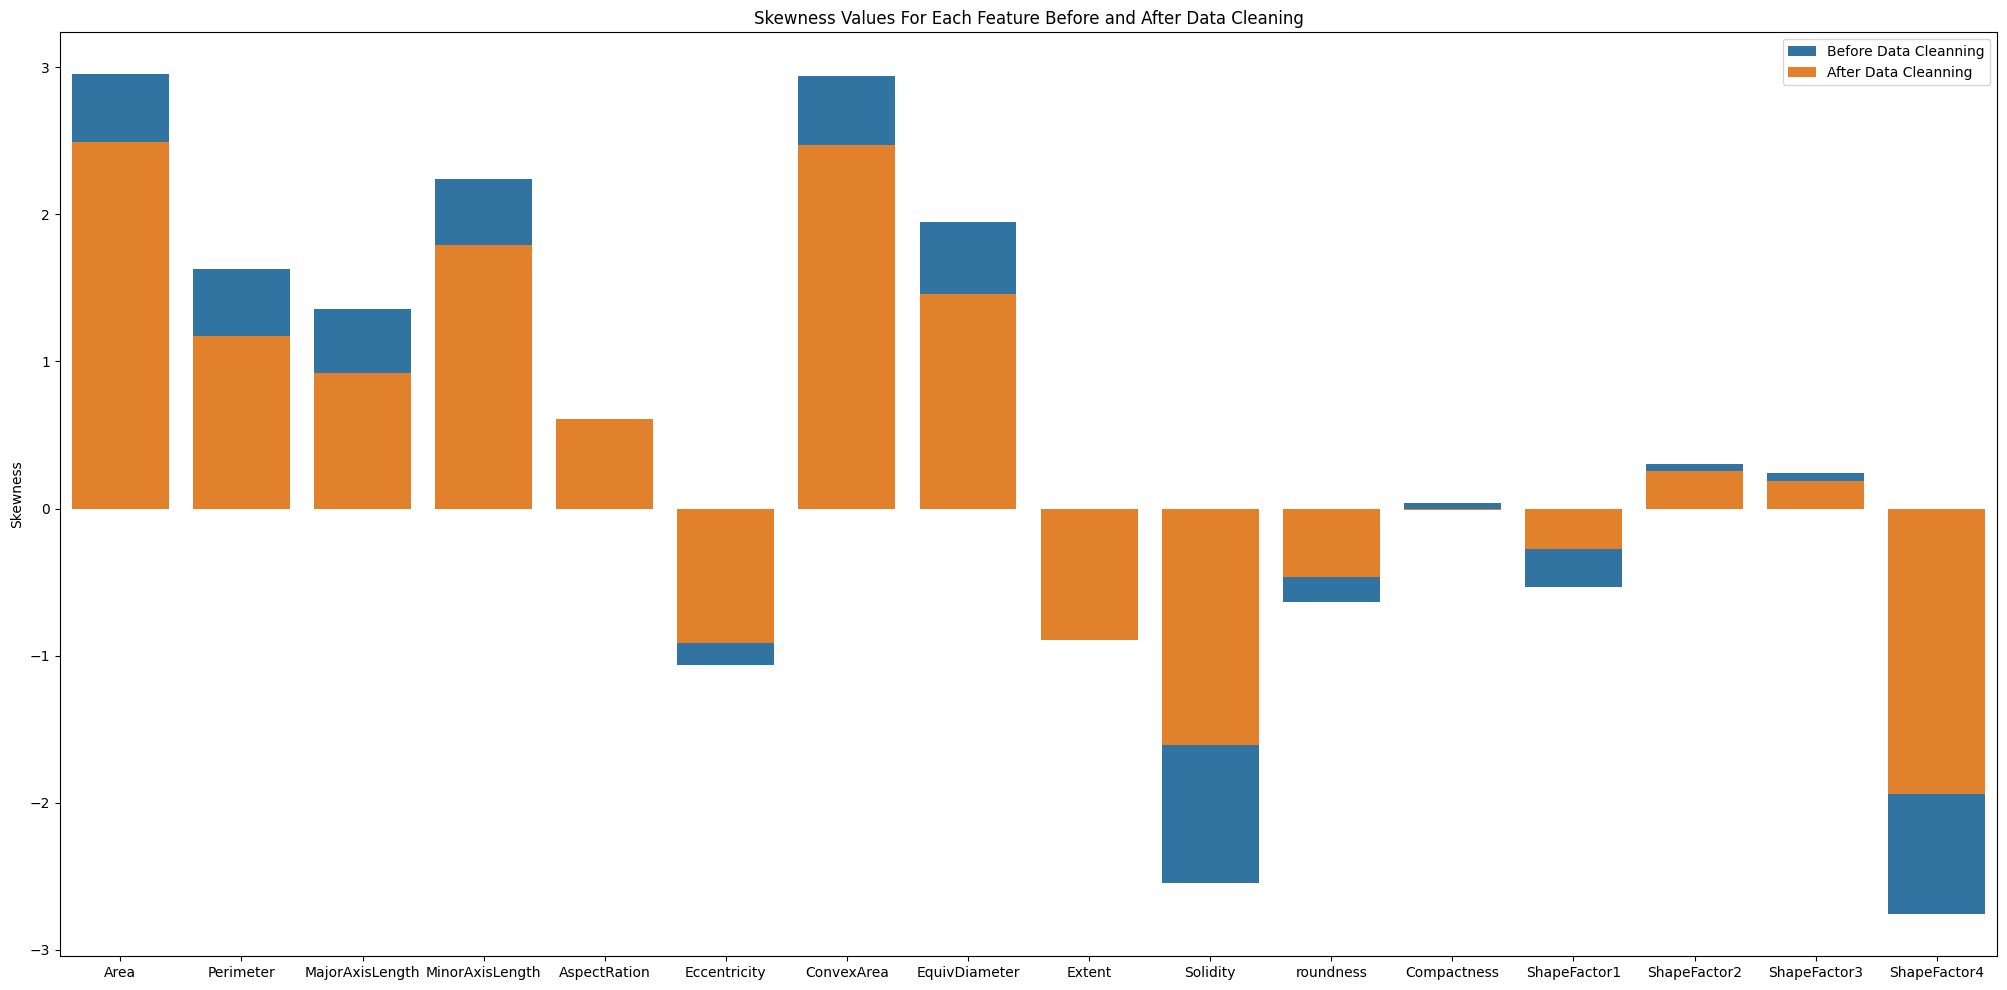

In [20]:
plt.figure(figsize=(25,12))
sns.barplot(skew_before_clean,label='Before Data Cleanning')
sns.barplot(skew_after_clean,label='After Data Cleanning')
plt.legend()
plt.ylabel('Skewness');
plt.title('Skewness Values For Each Feature Before and After Data Cleaning');

The figure shows the reduction of skewness values for most of the features. In other words, the distribution of data after data cleaning has become more symmetrical than before.

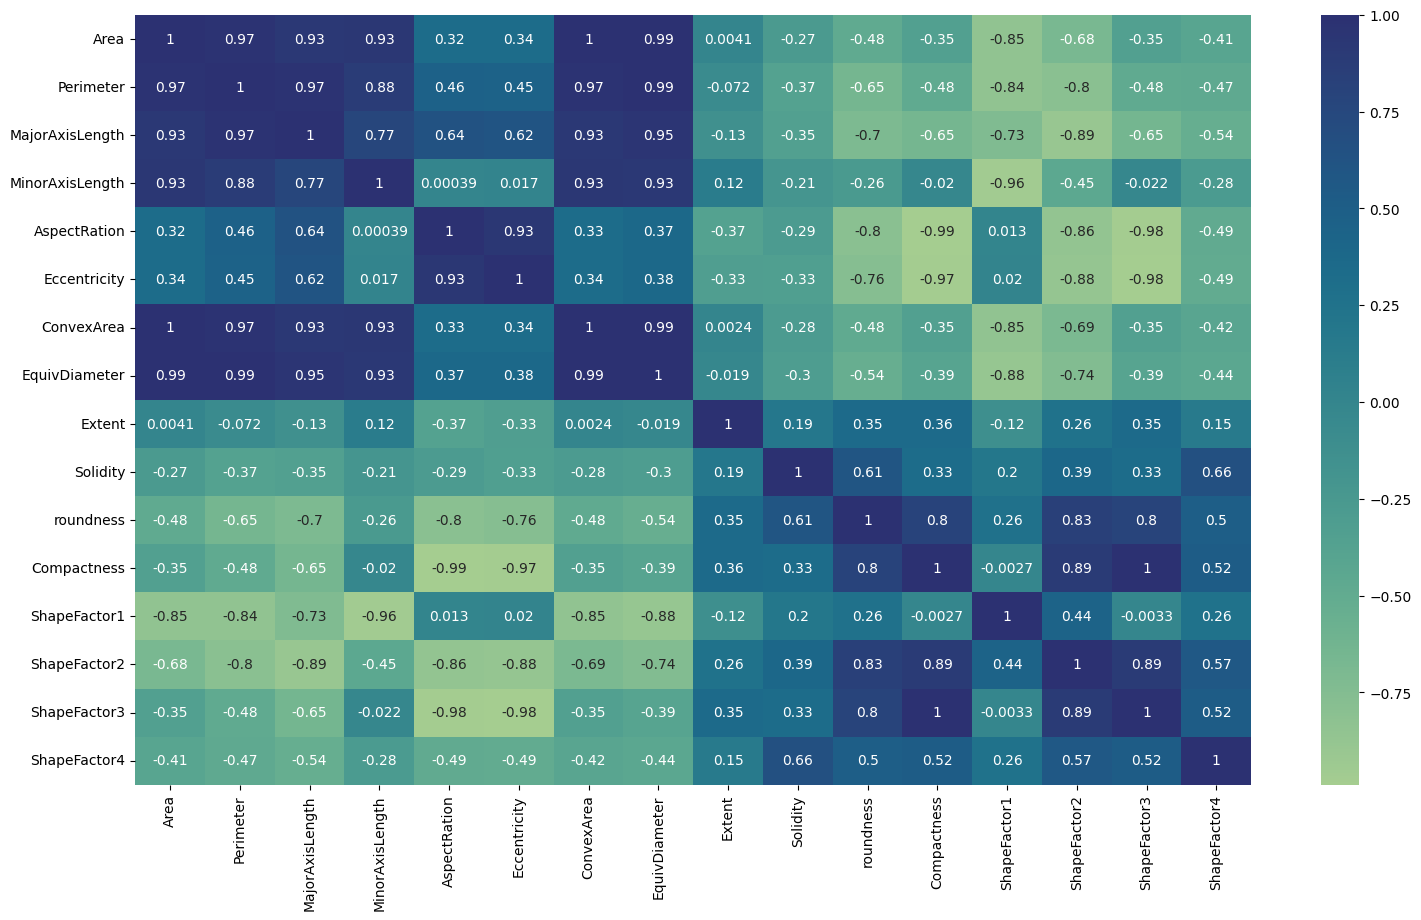

In [21]:
plt.figure(figsize=(18,10))
sns.heatmap(bean_df.drop('Class',axis=1).corr(method='pearson'),annot=True,cmap='crest');

The above figure shows the Pearson correlation coefficient between the features. As can be seen, some features have a high correlation with each other. Hence, feature selection seems to be a necessary step. By using tree-based algorithms, this step is done automatically. For other algorithms, Chi-squared method is used to select features before modeling.

<font color = 'yellow'><h2>Results & Modeling</h2></font>

In [22]:
X = bean_df.drop('Class',axis=1) # Features
y = bean_df['Class'] # Label

In [23]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
y_new = label_enc.fit_transform(y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_new, test_size=0.2, stratify=y_new,random_state=42)

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
classes_idx = np.array(list(enumerate(label_enc.classes_)))
classes_idx

array([['0', 'BARBUNYA'],
       ['1', 'BOMBAY'],
       ['2', 'CALI'],
       ['3', 'DERMASON'],
       ['4', 'HOROZ'],
       ['5', 'SEKER'],
       ['6', 'SIRA']], dtype='<U11')

After performing preliminary analysis on the data, the data should be prepared for the relevant task. In the first step, the feature matrix and the label vector are determined. Since the desired task is _classification_, so the appropriate encoding for the `Class` (label) should be done. The label mentioned in this research is of _nominal_ type, so _LabelEncoder_ is used for this purpose. In order to prevent some problems in the process of training models, data _normalization_ or _standardization_ is needed.

In order to _evaluate_ the model and check its _generality_, it is necessary to divide the data into two parts, training and testing sets. One of the most important points when separating the data into two groups of training and testing is to do it homogeneously. In other words, the test data should be sampled without bias and there should be a sample from all classes in the test data. Data separation into training and test sets should be done before data normalization, because this prevents _data leakage_.

<h3>Classification Metrics</h3>

<font color='cyan'>Binary Class Metrics: </font>

$$ Accuracy = \frac{TP + TN}{TP + FP + TN + FN} $$

It is used to measure the ratio of accurately estimated samples to the total number of samples. It can be considered that the model is the
best if there is high accuracy in the model used.

$$ Recall = \frac{TP}{TP + FN} $$

It is used to measure the proportion of positive values classified as true.

$$ Precision = \frac{TP}{TP + FP} $$

The ratio of correctly classified positive samples to estimated total positive samples. This is also called a Positive Predictive Value (PPV).

$$ F1-Score = \frac{2 * Precision * Recall}{Precision + Recall} $$

It is the harmonic mean of sensitivity. Therefore, it takes into account both false positives and false negatives. Especially in cases of
irregular class distribution, looking at the F1-score may be more useful than looking at the accuracy.

<font color='cyan'>Multiple Class Metrics:</font>

$$ Averaged Accuracy = \frac{\sum_{i=1}^{l} \frac{TP_{i} + TN_{i}}{TP_{i} + FN_{i} + FP_{i} + TN_{i}}}{l} $$


$$ Averaged Precision = \frac{\sum_{i=1}^{l}\frac{TP_{i}}{TP_{i} + FP_{i}}}{l} $$


$$ Averaged Recall = \frac{\sum_{i=1}^{l}\frac{TP_{i}}{TP_{i} + FN_{i}}}{l} $$

$$ F1-Score(Averaged F-Measure) = \frac{2 * Averaged Precision * AveragedRecall}{Averaged Precision + AveragedRecall} $$

<font color='#5bf540'>Decision Tree (DT):</font>

A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

To perform the classification task, the _class_weight_ is considered due to the imbalance of the dataset. **class_weight='balanced'** is a convenient way to automatically adjust the class weights inversely proportional to class frequencies in the input data. This can be particularly useful when dealing with imbalanced datasets where some classes have significantly fewer samples than others. In addition, the _GridSearchCV_ and _StratifiedKFold_ (K = 5) methods have been used to find the optimal hyperparameters and prevent over-fitting issue.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
params = {'max_depth': [3, 6, 9, 12],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [3, 5, 8, 12],
          'min_samples_split': [3, 4, 6, 9]}
grid = GridSearchCV(estimator=dt_model, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                    param_grid=params, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12],
                         'min_samples_leaf': [3, 5, 8, 12],
                         'min_samples_split': [3, 4, 6, 9]},
             scoring='accuracy')

The optimal values for hyperparameters are determined as follows:

In [30]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 12,
 'min_samples_split': 3}

In [31]:
best_dt_model = grid.best_estimator_

Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.

In [32]:
grid.best_score_

0.9109447934088267

Mean cross-validated score of the best estimator is about 0.9109 for the DT approach.

Now, scores are also calculated separately for training and testing sets.

In [33]:
best_dt_model.score(X_train,y_train)

0.9370527944304776

The score (mean accuracy) for training set is approximately 0.9371.

In [34]:
best_dt_model.score(X_test, y_test)

0.9021655065738592

Also, The score for testing set is approximately 0.9022.

The obtained results show a good fit of the model on the data. In other words, the model has shown good performance.

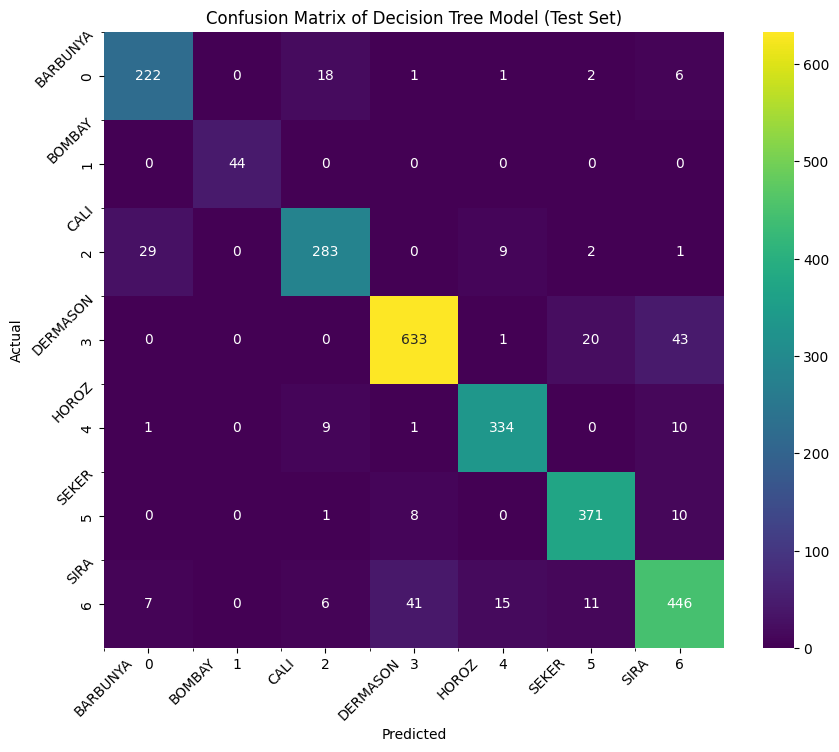

In [36]:
from sklearn.metrics import confusion_matrix
yhat_test = best_dt_model.predict(X_test)
dt_conf_mat = confusion_matrix(y_test, yhat_test)

plt.figure(figsize=(10,8))
sns.heatmap(dt_conf_mat,annot=True,fmt='d',cmap="viridis")
plt.title('Confusion Matrix of Decision Tree Model (Test Set)');
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);
plt.yticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);

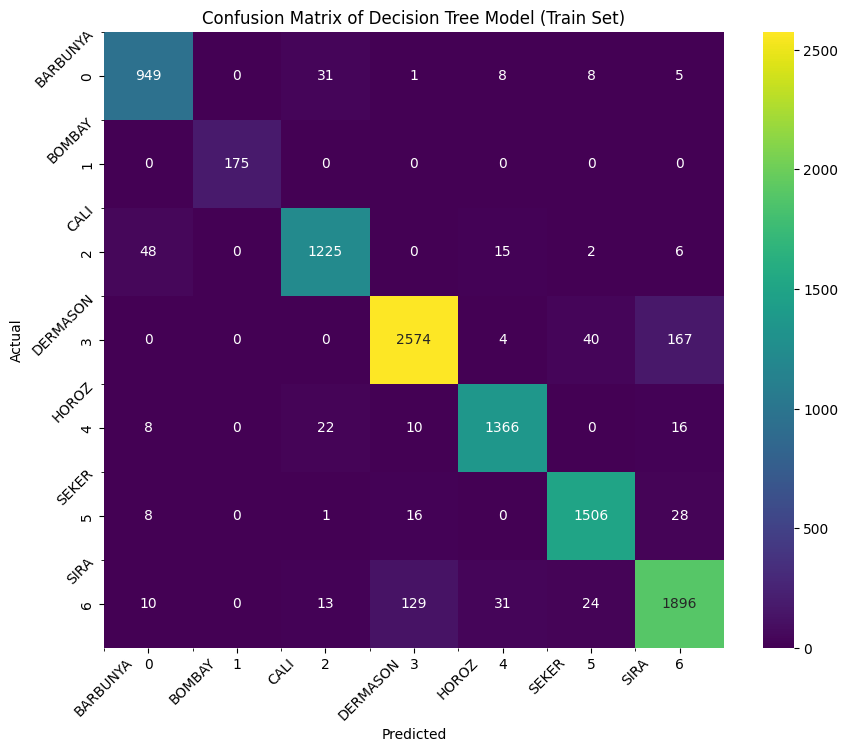

In [37]:
from sklearn.metrics import confusion_matrix
yhat_train = best_dt_model.predict(X_train)
dt_conf_mat = confusion_matrix(y_train, yhat_train)

plt.figure(figsize=(10,8))
sns.heatmap(dt_conf_mat,annot=True,fmt='d',cmap="viridis")
plt.title('Confusion Matrix of Decision Tree Model (Train Set)');
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);
plt.yticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);

This figure shows the confusion matrix for the decision tree model. The main diagonal elements determine the number of samples that are correctly classified. As can be seen in the figure, the model was able to classify the different classes well, although in some cases, the data were misclassified.

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat_test,target_names=label_enc.classes_,digits=4))

              precision    recall  f1-score   support

    BARBUNYA     0.8571    0.8880    0.8723       250
      BOMBAY     1.0000    1.0000    1.0000        44
        CALI     0.8927    0.8735    0.8830       324
    DERMASON     0.9254    0.9082    0.9167       697
       HOROZ     0.9278    0.9408    0.9343       355
       SEKER     0.9138    0.9513    0.9322       390
        SIRA     0.8643    0.8479    0.8560       526

    accuracy                         0.9022      2586
   macro avg     0.9116    0.9157    0.9135      2586
weighted avg     0.9021    0.9022    0.9020      2586



In [39]:
print(classification_report(y_train,yhat_train,target_names=label_enc.classes_,digits=4))

              precision    recall  f1-score   support

    BARBUNYA     0.9277    0.9471    0.9373      1002
      BOMBAY     1.0000    1.0000    1.0000       175
        CALI     0.9481    0.9452    0.9467      1296
    DERMASON     0.9429    0.9242    0.9335      2785
       HOROZ     0.9593    0.9606    0.9599      1422
       SEKER     0.9532    0.9660    0.9595      1559
        SIRA     0.8952    0.9016    0.8984      2103

    accuracy                         0.9371     10342
   macro avg     0.9466    0.9493    0.9479     10342
weighted avg     0.9371    0.9371    0.9370     10342



Classification criteria have been calculated for both training and testing datasets. These results show that the model has been able to classify the classes well. However, for some classes, the value of f1-score is lower than other classes. For example, _SIRA_ has the lowest value of the mentioned criterion in both training and testing sets. Also, f1-score value is equal to one for _BOMBAY_ type.

<font color='#5bf540'>Random Forest (RF):</font>

Random forest is an ensemble learning method that operates by constructing a multitude of decision trees during training and outputting the mode of the classes (classification) or the mean prediction (regression) of the individual trees. The key idea behind random forest is to introduce randomness in the tree-building process to improve the performance and robustness of the model.

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

rf_model = RandomForestClassifier(random_state=42,class_weight='balanced')
params = {'max_depth': [3, 6, 9, 12],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [3, 5, 10],
          'min_samples_split': [3, 5, 10],
          'n_estimators': [100, 150, 200]}
grid = GridSearchCV(estimator=rf_model, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                    param_grid=params, scoring='accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 6, 9, 12],
                         'min_samples_leaf': [3, 5, 10],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

The optimal values for hyperparameters are determined as follows:

In [41]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 150}

Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data.

In [42]:
best_rf_model = grid.best_estimator_

In [43]:
grid.best_score_

0.9224521419162679

Mean cross-validated score of the best estimator is about 0.9225 for the RF approach. Using the Random Forest model, compared to the decision tree method (including a tree), as an ensemble method has been effective in improving the result.

In [44]:
best_rf_model.score(X_train,y_train)

0.9686714368594083

The mean accuracy for the training set is approximately 0.9687.

In [45]:
best_rf_model.score(X_test, y_test)

0.9160866202629544

For the test set, the value of this criterion is equal to 0.9161. Both training and test sets show acceptable values of mean accuracy.

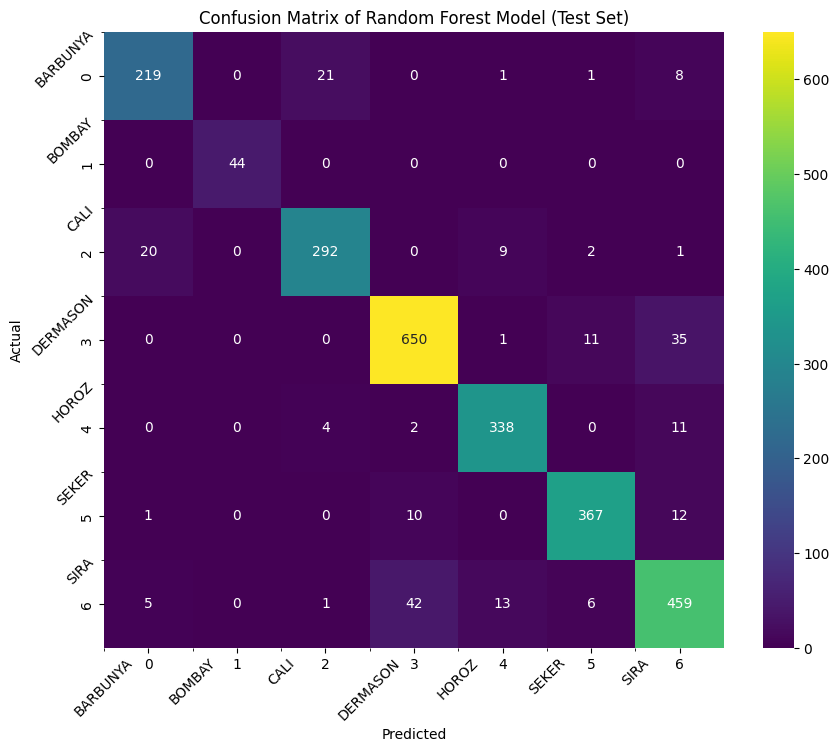

In [46]:
from sklearn.metrics import confusion_matrix
yhat_test = best_rf_model.predict(X_test)
rf_conf_mat = confusion_matrix(y_test, yhat_test)

plt.figure(figsize=(10,8))
sns.heatmap(rf_conf_mat,annot=True,fmt='d',cmap="viridis")
plt.title('Confusion Matrix of Random Forest Model (Test Set)');
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);
plt.yticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);

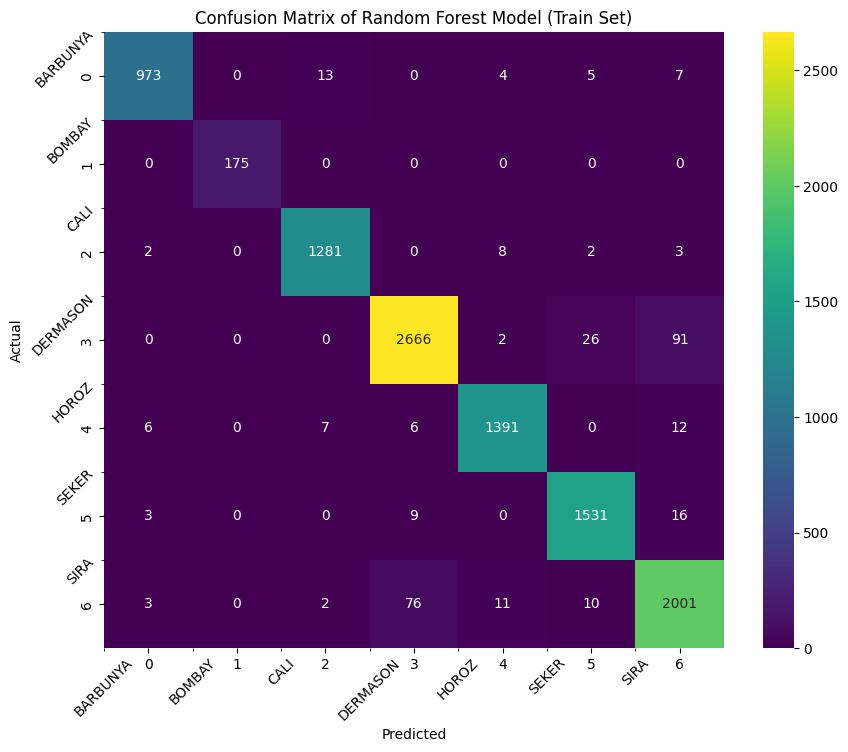

In [47]:
from sklearn.metrics import confusion_matrix
yhat_train = best_rf_model.predict(X_train)
rf_conf_mat = confusion_matrix(y_train, yhat_train)

plt.figure(figsize=(10,8))
sns.heatmap(rf_conf_mat,annot=True,fmt='d',cmap="viridis")
plt.title('Confusion Matrix of Random Forest Model (Train Set)');
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);
plt.yticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);

The above figures show the confusion matrix for the training and test sets. As seen in these figures, the classes are well classified by the Random Forest model. Although, like the Decision Tree model, the RF model also failed to perform well in the classification of some classes such as SIRA.

In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat_test,target_names=label_enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.89      0.88      0.88       250
      BOMBAY       1.00      1.00      1.00        44
        CALI       0.92      0.90      0.91       324
    DERMASON       0.92      0.93      0.93       697
       HOROZ       0.93      0.95      0.94       355
       SEKER       0.95      0.94      0.94       390
        SIRA       0.87      0.87      0.87       526

    accuracy                           0.92      2586
   macro avg       0.93      0.93      0.93      2586
weighted avg       0.92      0.92      0.92      2586



In [49]:
print(classification_report(y_train,yhat_train,target_names=label_enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.99      0.97      0.98      1002
      BOMBAY       1.00      1.00      1.00       175
        CALI       0.98      0.99      0.99      1296
    DERMASON       0.97      0.96      0.96      2785
       HOROZ       0.98      0.98      0.98      1422
       SEKER       0.97      0.98      0.98      1559
        SIRA       0.94      0.95      0.95      2103

    accuracy                           0.97     10342
   macro avg       0.98      0.98      0.98     10342
weighted avg       0.97      0.97      0.97     10342



Different criteria such as precision, recall and f1-score have been calculated for each class. By examining and comparing the results obtained for the training and test sets, it can be seen that the model has succeeded in classifying each class acceptably. Although the performance of the model, according to the value of f1-score in the SIRA category, is weaker than other classes for both training and testing sets.

<font color='#5bf540'>Logistic Regression :</font>

Logistic regression is a statistical model used to analyze the relationship between a categorical dependent variable and one or more independent variables. The logistic regression model predicts the probability that the dependent variable belongs to a particular category based on the values of the independent variables. The logistic regression model uses the logistic function (also known as the sigmoid function) to map the linear combination of the independent variables to a value between 0 and 1, representing the probability of the dependent variable being in a particular category.

Tree-based models automatically perform feature selection and finally produce a model with high interpretability. However, for other models such as logistic regression, feature selection must be done before creating the model. For this purpose, each time a certain number of features are selected by chi-squared method and modeling is done using logistic regression algorithm. Then, the mean accuracy values for the training and test sets are calculated.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


k_features = np.arange(1, X.shape[1]+1)
train_scores = np.zeros(k_features.shape)
test_scores = np.zeros(k_features.shape)
scores = np.zeros(k_features.shape)
for idx, k in enumerate(k_features):
    selector = SelectKBest(score_func=chi2, k=k)
    X_train_best = selector.fit_transform(X_train, y_train)
    X_test_best = selector.transform(X_test)

    logreg_model = LogisticRegression(
        random_state=42, max_iter=500, class_weight='balanced')
    params = {'C': [0.01, 0.1, 1, 10, 100, 1000],
              'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga']}
    grid = GridSearchCV(estimator=logreg_model, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                        param_grid=params, scoring='accuracy')
    grid.fit(X_train_best, y_train)

    scores[idx] = grid.best_score_
    train_scores[idx] = grid.best_estimator_.score(X_train_best, y_train)
    test_scores[idx] = grid.best_estimator_.score(X_test_best, y_test)

(0.5, 1.0)

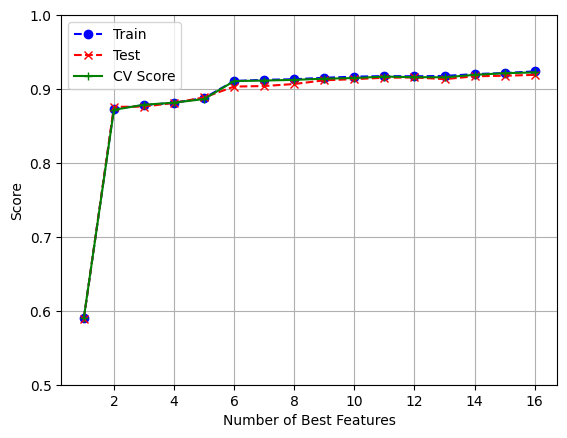

In [35]:
plt.figure()
plt.plot(k_features, train_scores,'bo--',label='Train')
plt.plot(k_features, test_scores,'rx--',label='Test')
plt.plot(k_features, scores,'g+-',label='CV Score')
plt.grid(which='both')
plt.xlabel('Number of Best Features')
plt.ylabel('Score')
plt.legend()
plt.ylim((0.5, 1))

The above figure shows the different values of score for the CV, training and test set vs. the number of the best features selected by the chi-squared method. As can be seen from the figure, with the increase in the number of selected features, the accuracy of the model increases for both training and test sets. However, selecting 6 or more features does not increase the accuracy of the model much. Therefore, choosing 6 features will help to simplify the model and also reduce the dimensions of the problem. These results can be applied to other models that are not based on trees.

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

selector = SelectKBest(score_func=chi2, k=6)
X_train_best = selector.fit_transform(X_train, y_train)
X_test_best = selector.transform(X_test)

new_features = selector.get_feature_names_out(X.columns)

pd.DataFrame(X_train_best,columns=new_features).describe()

,Area,Perimeter,MajorAxisLength,AspectRation,ConvexArea,ShapeFactor2
count,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000,10342.000000
mean,0.169251,0.263978,0.273083,0.376525,0.168806,0.398625
std,0.128574,0.155638,0.166315,0.193605,0.128509,0.225578
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087316,0.147664,0.136959,0.257661,0.086671,0.184972
50%,0.134560,0.222544,0.229536,0.350945,0.133846,0.391968
75%,0.224956,0.373139,0.404812,0.472534,0.224662,0.572314
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The statistical evaluation as well as the selected features based on the chi-squared method can be seen in the above table.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

logreg_model = LogisticRegression(random_state=42,max_iter=500,class_weight='balanced')
params = {'C': [0.01, 0.1, 1, 10, 100, 1000],
          'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga']}
grid = GridSearchCV(estimator=logreg_model, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                    param_grid=params, scoring='accuracy')
grid.fit(X_train_best, y_train)

The optimal values for hyperparameters are determined as follows:

In [38]:
grid.best_params_

{'C': 1000, 'solver': 'newton-cg'}

In [39]:
best_logreg_model = grid.best_estimator_

In [40]:
grid.best_score_

0.9107519307302325

In [41]:
best_logreg_model.score(X_train_best,y_train)

0.9109456584799845

In [42]:
best_logreg_model.score(X_test_best, y_test)

0.9033255993812839

Mean cross-validated score of the best estimator is about 0.9108 for the logistic regression method. Also, the scores for training and testing sets are 0.9109 and 0.9033, respectively.

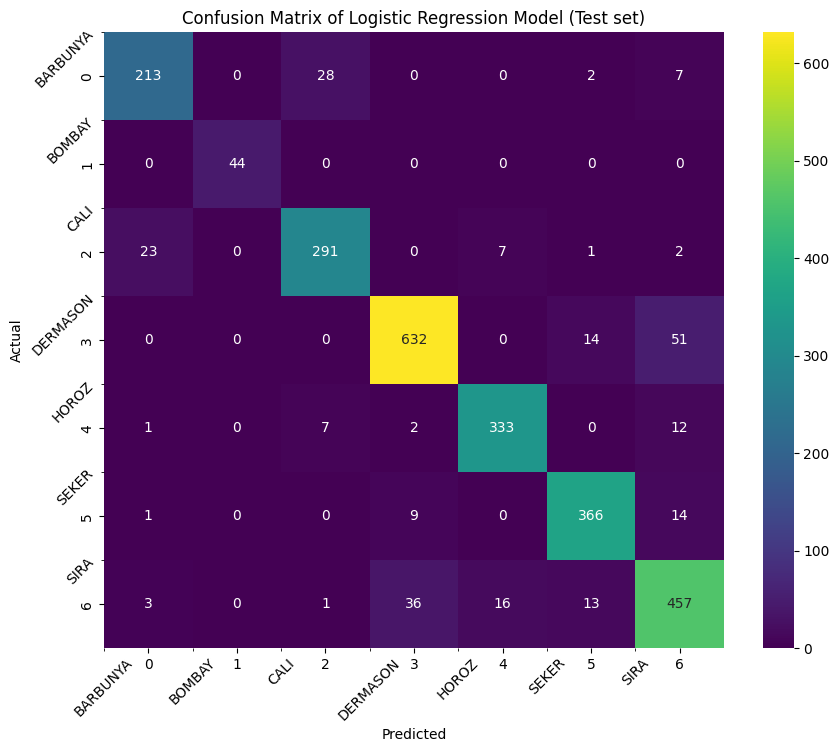

In [49]:
from sklearn.metrics import confusion_matrix
yhat_test = best_logreg_model.predict(X_test_best)
logreg_conf_mat = confusion_matrix(y_test, yhat_test)

plt.figure(figsize=(10,8))
sns.heatmap(logreg_conf_mat,annot=True,fmt='d',cmap="viridis")
plt.title('Confusion Matrix of Logistic Regression Model (Test set)');
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);
plt.yticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);

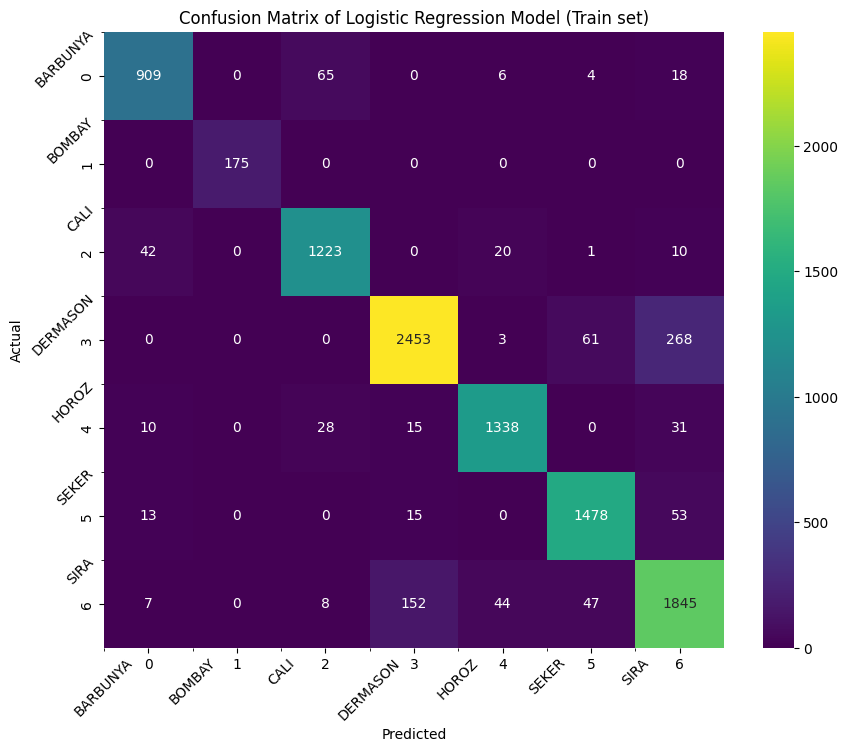

In [50]:
from sklearn.metrics import confusion_matrix
yhat_train = best_logreg_model.predict(X_train_best)
logreg_conf_mat = confusion_matrix(y_train, yhat_train)

plt.figure(figsize=(10,8))
sns.heatmap(logreg_conf_mat,annot=True,fmt='d',cmap="viridis")
plt.title('Confusion Matrix of Logistic Regression Model (Train set)');
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);
plt.yticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);

The above figures show the confusion matrix for the training and test sets. The acceptable performance of the model in the classification of different classes can be understood according to the mentioned figures.

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat_test,target_names=label_enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.88      0.85      0.87       250
      BOMBAY       1.00      1.00      1.00        44
        CALI       0.89      0.90      0.89       324
    DERMASON       0.93      0.91      0.92       697
       HOROZ       0.94      0.94      0.94       355
       SEKER       0.92      0.94      0.93       390
        SIRA       0.84      0.87      0.86       526

    accuracy                           0.90      2586
   macro avg       0.92      0.91      0.91      2586
weighted avg       0.90      0.90      0.90      2586



In [46]:
print(classification_report(y_train,yhat_train,target_names=label_enc.classes_))

              precision    recall  f1-score   support

    BARBUNYA       0.93      0.91      0.92      1002
      BOMBAY       1.00      1.00      1.00       175
        CALI       0.92      0.94      0.93      1296
    DERMASON       0.93      0.88      0.91      2785
       HOROZ       0.95      0.94      0.94      1422
       SEKER       0.93      0.95      0.94      1559
        SIRA       0.83      0.88      0.85      2103

    accuracy                           0.91     10342
   macro avg       0.93      0.93      0.93     10342
weighted avg       0.91      0.91      0.91     10342



The above tables show the results of model evaluations based on different criteria for each class. These results show that the classification of each class is done well by the logistic regression model.

<font color='#5bf540'>Support Vector Classifier (SVC):</font>

A Support Vector Classifier (SVC) is a supervised machine learning algorithm that is used for classification tasks. It works by finding the hyperplane that best separates the different classes in the feature space. The hyperplane is chosen in such a way that it maximizes the margin between the classes, which helps in making accurate predictions on new, unseen data.

In this section, features selected using chi-squared method and logistic regression algorithm are used. In other words, six features are considered to create the model.

In [54]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

svc_model = SVC(random_state=42)
params = {'C': [0.01, 0.1, 1, 10, 100],
          'kernel': ['rbf', 'poly', 'linear'],
          'degree': [2, 3, 5]}
grid = GridSearchCV(estimator=svc_model, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                    param_grid=params, scoring='accuracy')
grid.fit(X_train_best, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 5],
                         'kernel': ['rbf', 'poly', 'linear']},
             scoring='accuracy')

In [55]:
best_svc_model = grid.best_estimator_

In [56]:
grid.best_score_

0.923031758303706

In [57]:
best_svc_model.score(X_train_best,y_train)

0.9254496228969251

In [58]:
best_svc_model.score(X_test_best, y_test)

0.9207269914926527

Mean cross-validated score of the best estimator is about 0.9230 for the SVC. Besides, the scores for training and testing sets are 0.9254 and 0.9207, respectively.

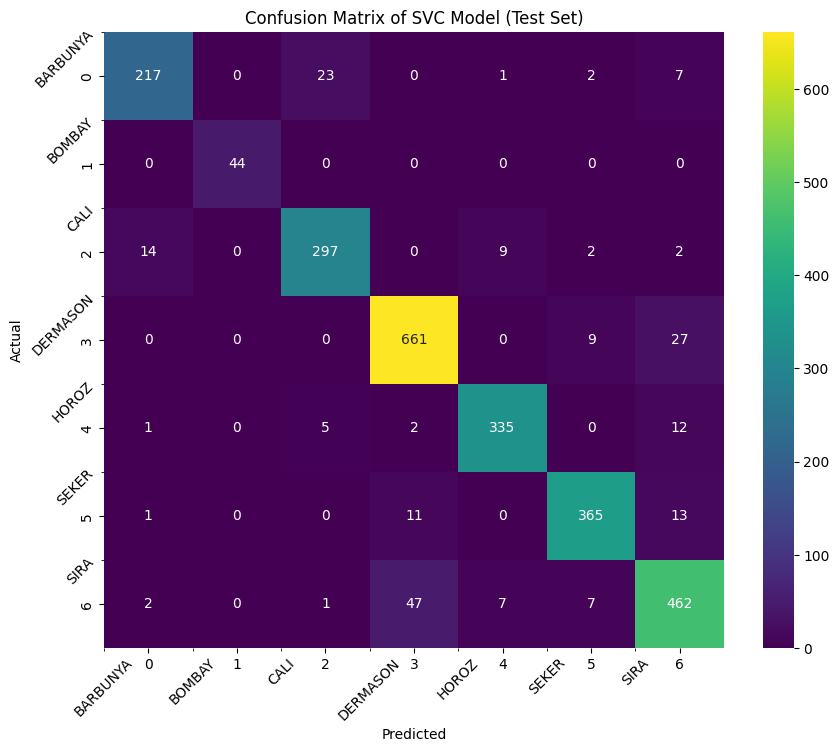

In [59]:
from sklearn.metrics import confusion_matrix
yhat_test = best_svc_model.predict(X_test_best)
svc_conf_mat = confusion_matrix(y_test, yhat_test)

plt.figure(figsize=(10,8))
sns.heatmap(svc_conf_mat,annot=True,fmt='d',cmap="viridis")
plt.title('Confusion Matrix of SVC Model (Test Set)');
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);
plt.yticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);

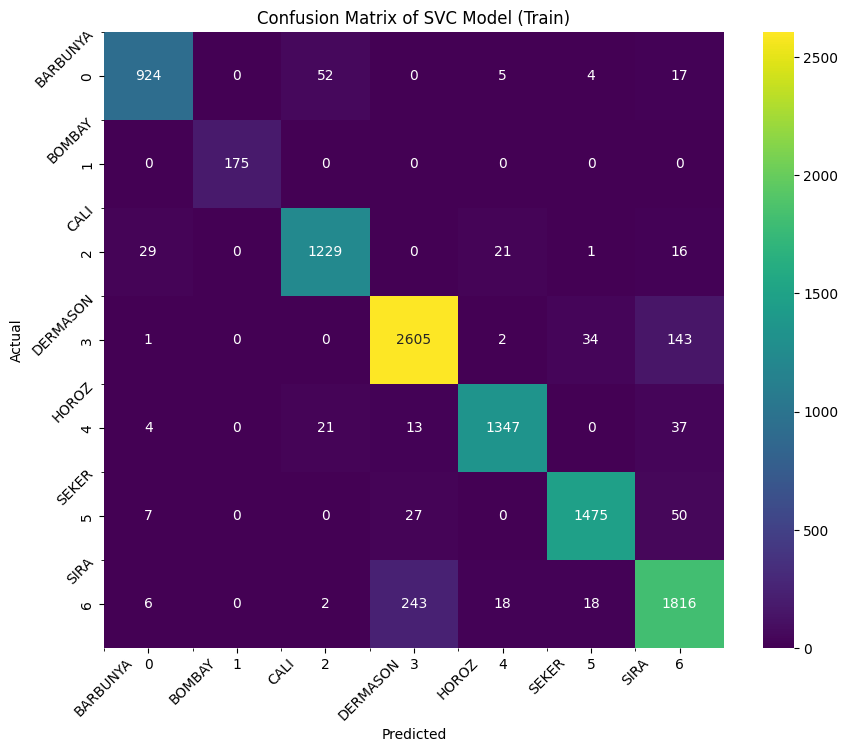

In [60]:
from sklearn.metrics import confusion_matrix
yhat_train = best_svc_model.predict(X_train_best)
svc_conf_mat = confusion_matrix(y_train, yhat_train)

plt.figure(figsize=(10,8))
sns.heatmap(svc_conf_mat,annot=True,fmt='d',cmap="viridis")
plt.title('Confusion Matrix of SVC Model (Train)');
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);
plt.yticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);

The above figures show the confusion matrix for the training and test sets. The acceptable performance of the model in the classification of different classes can be understood according to the mentioned figures. This model has the highest accuracy compared to others. Therefore, the SVC model will be a good choice for classifying different types of dry beans. 

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,yhat_test,target_names=label_enc.classes_,digits=4))

              precision    recall  f1-score   support

    BARBUNYA     0.9234    0.8680    0.8948       250
      BOMBAY     1.0000    1.0000    1.0000        44
        CALI     0.9110    0.9167    0.9138       324
    DERMASON     0.9168    0.9484    0.9323       697
       HOROZ     0.9517    0.9437    0.9477       355
       SEKER     0.9481    0.9359    0.9419       390
        SIRA     0.8834    0.8783    0.8808       526

    accuracy                         0.9207      2586
   macro avg     0.9335    0.9273    0.9302      2586
weighted avg     0.9208    0.9207    0.9206      2586



In [59]:
print(classification_report(y_train,yhat_train,target_names=label_enc.classes_,digits=4))

              precision    recall  f1-score   support

    BARBUNYA     0.9516    0.9222    0.9366      1002
      BOMBAY     1.0000    1.0000    1.0000       175
        CALI     0.9425    0.9483    0.9454      1296
    DERMASON     0.9020    0.9354    0.9184      2785
       HOROZ     0.9670    0.9473    0.9570      1422
       SEKER     0.9628    0.9461    0.9544      1559
        SIRA     0.8735    0.8635    0.8685      2103

    accuracy                         0.9254     10342
   macro avg     0.9428    0.9375    0.9400     10342
weighted avg     0.9258    0.9254    0.9255     10342



f1-score values have been calculated for both training and test sets. These values also show the superiority of the SVC model in the classification of different types of dry beans. For the model, the value of f1-score for the SIRA class in the test set is the lowest compared to other classes, but this value is higher than other models that have tried to classify this class.

<font color='#5bf540'>K-Means (Unsupervised Approach):</font>

K-means is a popular clustering algorithm used in machine learning to partition a dataset into K clusters. The algorithm works by iteratively assigning data points to the nearest cluster centroid and updating the centroids based on the mean of the points in each cluster. The objective is to minimize the sum of squared distances between data points and their respective cluster centroids.

In this section, we try to consider the defined problem as unsupervised and solve it with a method like K-means. To do so, we transform the data into clusters with the number of classes (k = 7).

In [27]:
from sklearn.preprocessing import MinMaxScaler
new_scaler = MinMaxScaler(feature_range=(0, 1))
X_new = new_scaler.fit_transform(X)

In [28]:
from sklearn.cluster import KMeans
n_cluster = 7
kmeans_mdl = KMeans(n_clusters=n_cluster,random_state=42)
clusters = kmeans_mdl.fit_predict(X_new, y_new)

In [29]:
from scipy.stats import mode

labels = np.zeros(clusters.shape)
for i in range(n_cluster):
    mask = (clusters == i)
    labels[mask] = mode(y_new[mask])[0]

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_new, labels)

0.7742883663366337

The accuracy of the model built with the mentioned method for clustering data into 7 different categories is acceptable.

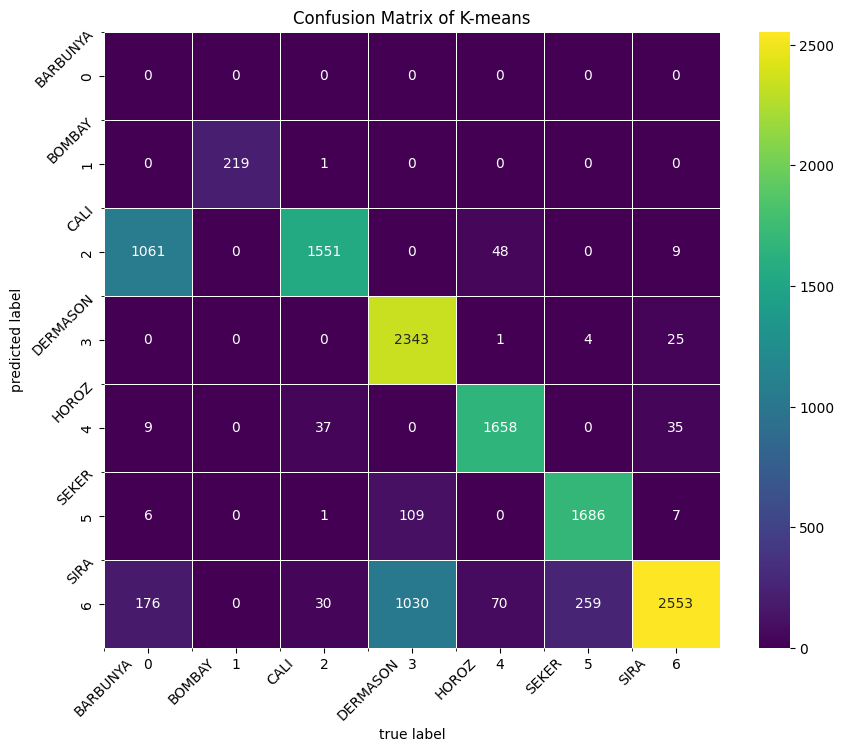

In [31]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,8))
mat = confusion_matrix(y_new, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',cmap="viridis",linewidths=0.5)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Confusion Matrix of K-means');
plt.xticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);
plt.yticks(np.int32(classes_idx[:,0]),classes_idx[:,1],rotation=45,minor=True);

The confusion matrix for the K-means algorithm is drawn in the above figure. As can be seen in this figure, the model was able to do the clustering almost correctly. However, the clustering of BARBUNYA data is not done properly. In fact, none of the mentioned class data are correctly clustered.

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_new,labels,target_names=label_enc.classes_,digits=2))

              precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00      1252
      BOMBAY       1.00      1.00      1.00       219
        CALI       0.58      0.96      0.72      1620
    DERMASON       0.99      0.67      0.80      3482
       HOROZ       0.95      0.93      0.94      1777
       SEKER       0.93      0.87      0.90      1949
        SIRA       0.62      0.97      0.76      2629

    accuracy                           0.77     12928
   macro avg       0.72      0.77      0.73     12928
weighted avg       0.75      0.77      0.74     12928



c:\Users\Mohammad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohammad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Mohammad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In the above table, different criteria have been calculated for each class. As can be seen in this table, the classes are well clustered, but the BARBUNYA class is wrongly clustered.

<h2><font color='yellow'>Comparison & Conclusion</font></h2>

In this research, the aim was to classify seven types of dry beans using different machine learning algorithms. These algorithms are called Decision Tree (DT), Random Forest (RF), Logistic Regression, Support Vector Classifier (SVC) and K-Means. In the K-Means method, the problem is considered as an unsupervised problem. The accuracy of the models in the classification of seven types of dry beans for the training and test sets is given in the table below.

<table>
    <tr>
        <td>Model</td>
        <td><font color=#0590fa>Train Accuracy</font></td>
        <td><font color=#f05213>Test Accuracy</font></td>
    </tr>
    <tr>
        <td><font color=#13f0ae>Decision Tree</font></td>
        <td>0.9370</td>
        <td>0.9021</td>
    </tr>
    <tr>
        <td><font color=#13f0ae>Random Forest</font></td>
        <td>0.9686</td>
        <td>0.9160</td>
    </tr>
    <tr>
        <td><font color=#13f0ae>Logistic Regression</font></td>
        <td>0.9109</td>
        <td>0.9033</td>
    </tr>
    <tr>
        <td><font color=#13f0ae>Support Vector Classifier</font></td>
        <td>0.9254</td>
        <td><b>0.9207</b></td>
    </tr>
    <tr>
        <td><font color=#13f0ae>K-Means</font></td>
        <td><center>-</center></td>
        <td>0.7742</td>
    </tr>
</table>

By comparing the obtained results, it can be concluded that the models generally perform well in the classification of different classes, but the SVC model performed best. Moreover, the calculated f1-score values for different classes reveal the good accuracy of this model. The table below shows f1-score values for all models (test set).

<table>
    <tr>
        <td>Class</td>
        <td><font color=#13f0ae>Decision Tree</font></td>
        <td><font color=#13f0ae>Random Forest</font></td>
        <td><font color=#13f0ae>Logistic Regression</font></td>
        <td><font color=#13f0ae>Support Vector Classifier</font> </td>
        <td><font color=#13f0ae>K-Means</font></td>
    </tr>
    <tr>
        <td><font color=#fa7f05>BARBUNYA</font></td>
        <td>0.87</td>
        <td>0.88</td>
        <td>0.87</td>
        <td><b>0.89</b> </td>
        <td>0.00</td>
    </tr>
    <tr>
        <td><font color=#fa7f05>BOMBAY</font></td>
        <td>1.00</td>
        <td>1.00</td>
        <td>1.00</td>
        <td><b>1.00</b> </td>
        <td>1.00</td>
    </tr>
    <tr>
        <td><font color=#fa7f05>CALI</font></td>
        <td>0.88</td>
        <td>0.91</td>
        <td>0.89</td>
        <td><b>0.91</b> </td>
        <td>0.72</td>
    </tr>
    <tr>
        <td><font color=#fa7f05>DERMASON</font></td>
        <td>0.92</td>
        <td>0.93</td>
        <td>0.92</td>
        <td><b>0.93</b> </td>
        <td>0.80</td>
    </tr>
    <tr>
        <td><font color=#fa7f05>HOROZ</font></td>
        <td>0.93</td>
        <td>0.94</td>
        <td>0.94</td>
        <td><b>0.95</b></td>
        <td>0.94</td>
    </tr>
    <tr>
        <td><font color=#fa7f05>SEKER</font></td>
        <td>0.93</td>
        <td>0.94</td>
        <td>0.93</td>
        <td><b>0.94</b> </td>
        <td>0.90</td>
    </tr>
    <tr>
        <td><font color=#fa7f05>SIRA</font></td>
        <td>0.86</td>
        <td>0.87</td>
        <td>0.86</td>
        <td><b>0.88</b> </td>
        <td>0.76</td>
    </tr>
</table>

As can be seen in the above table, the value of the mentioned criterion is the maximum for all classes in the case of the SVC model. For all models, SIRA class classification has been difficult because the value of f1-score for this class was minimal in all models. Moreover, all the models have been able to classify the BOMBAY data correctly. K-Means method has not been able to detect the BARBUNYA class, but it has performed well in the classification of other classes.